# Airbnb Vienna Dashboard Project

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [2]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [3]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [4]:
df_list = pd.read_csv('listings-2.csv', sep = ',')
print(f'Rows : {df_list.shape[0]} Columns:{df_list.shape[1]}')
df_list.head()

Rows : 12525 Columns:18


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,38768,central cityapartement- wifi- nice neighbourhood,166283,Hannes,NaN,Leopoldstadt,48.21924,16.37831,Entire home/apt,79,5,357,2022-11-20,2.45,3,42,17,NaN
1,197968,Central 2 bedroom flat,965759,Pierre,NaN,Alsergrund,48.21919,16.35505,Entire home/apt,123,1,78,2022-12-31,0.61,2,338,10,NaN
2,40625,"Near Palace Schönbrunn, Apt. 1",175131,Ingela,NaN,Rudolfsheim-Fnfhaus,48.18434,16.32701,Entire home/apt,169,1,187,2023-01-02,1.22,15,324,25,NaN
3,51287,little studio- next to citycenter- wifi- nice ...,166283,Hannes,NaN,Leopoldstadt,48.21778,16.37847,Entire home/apt,71,5,360,2023-01-07,2.44,3,89,31,NaN
4,203691,"At the City center room with shower, sink",518644,Michael,NaN,Margareten,48.19347,16.35900,Private room,41,1,63,2023-01-14,0.45,34,310,24,NaN


In [5]:
# Count of unique id's
df_list['id'].nunique()

12525

In [6]:
df_list.isnull().sum()

id                                    0
name                                 12
host_id                               0
host_name                             2
neighbourhood_group               12525
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2170
reviews_per_month                  2170
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           12525
dtype: int64

In [7]:
df_list.drop(columns = ['neighbourhood_group','license'], inplace = True)

In [8]:
df_cal = pd.read_csv('calendar.csv',sep = ',')
print(f'Rows : {df_cal.shape[0]} Columns:{df_cal.shape[1]}')
df_cal.head()

Rows : 4571570 Columns:7


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,40625,2023-03-15,f,$164.00,$164.00,1,180
1,40625,2023-03-16,f,$164.00,$164.00,1,180
2,40625,2023-03-17,f,$183.00,$183.00,1,180
3,40625,2023-03-18,f,$183.00,$183.00,1,180
4,40625,2023-03-19,f,$164.00,$164.00,1,180


In [9]:
df_rev = pd.read_csv('reviews.csv')
print(f'Rows : {df_rev.shape[0]} Columns:{df_rev.shape[1]}')
df_rev.head()

Rows : 463195 Columns:6


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,38768,207567,2011-03-23,281880,Avi,Hannes' is nice. Good location next to the me...
1,38768,227667,2011-04-16,389656,Philip,Hannes made sure that we he would be there at ...
2,38768,448451,2011-08-15,936547,Gabriel,"Hannes' apartment was great, really clean and ..."
3,38768,497524,2011-09-03,808110,Brendan,"great place, great location, great host"
4,38768,632158,2011-10-16,1190454,Grig,"The apartment is great: clean, nice and functi..."


### Average price per each neighbourhood in Vienna 

In [10]:
df_grouped = (
              df_list
             .groupby('neighbourhood')
             .agg(avg_price = ('price', 'mean'))
             .sort_values('avg_price', ascending = False)
             .reset_index()
)
df_grouped.style.format({'avg_price':'{:.0f}'})

,neighbourhood,avg_price
0,Innere Stadt,194
1,Hietzing,139
2,Liesing,107
3,Landstra§e,102
4,Dbling,102
5,Wieden,102
6,Mariahilf,102
7,Donaustadt,102
8,Neubau,96
9,Favoriten,96


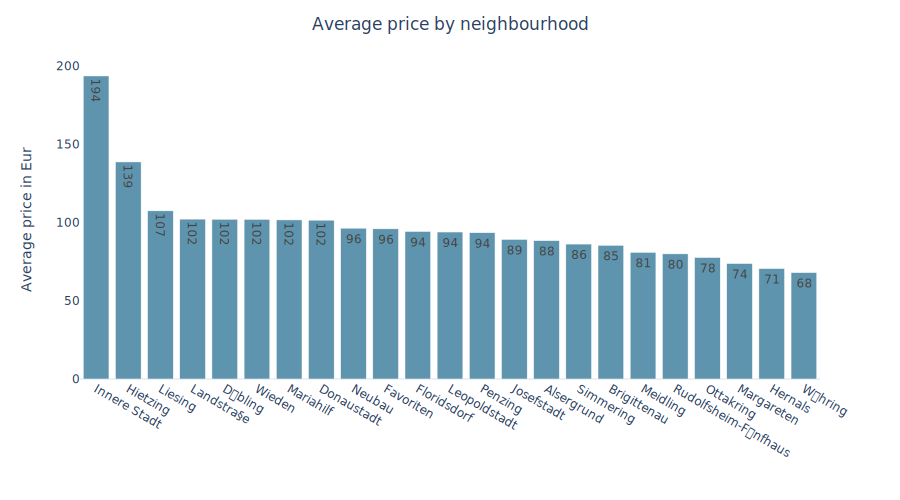

In [11]:
fig = (
       px.bar(df_grouped, x = 'neighbourhood', y = 'avg_price', text = 'avg_price')
       .update_layout(
           title = 'Average price by neighbourhood',
           title_x = 0.5,
           yaxis_title = 'Average price in Eur',
           xaxis_title = ' ',
           yaxis_showgrid = False,
           template = 'plotly_white',
           height = 500,
           width = 900
       )
      .update_traces(
          textposition = 'inside',
          texttemplate = '%{text:.0f}',
          marker_color = '#5f94ae'
      )
          
)         
fig.show(renderer='svg')

### Average price per each room type in Vienna

In [12]:
df_room =   (
              df_list
             .groupby('room_type')
             .agg(avg_price = ('price', 'mean'))
             .sort_values('avg_price', ascending = False)
             .reset_index()
)

In [13]:
df_room['avg_price'] = df_room['avg_price'].apply(lambda x: round(x,0)).astype(int)

In [14]:
df_room

,room_type,avg_price
0,Hotel room,141
1,Entire home/apt,102
2,Private room,73
3,Shared room,48


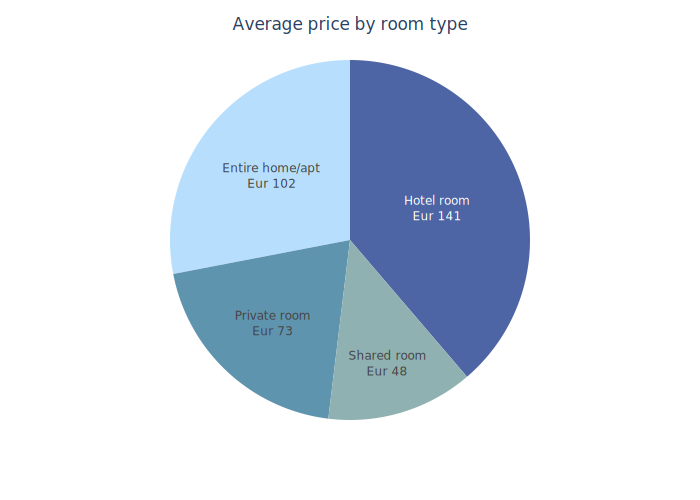

In [15]:
fig = (
      px.pie( df_room, values = 'avg_price', names = 'room_type')
      .update_layout(
          showlegend = False,
          title = 'Average price by room type',
          title_x = 0.5,
          height = 500
      )
          
     .update_traces(
          textposition = 'inside',
          text = df_room['avg_price'].map('Eur {:.0f}'.format),
          textinfo = 'label + text' ,
          marker_colors = ['#4d65a4','#b7dffd','#5f94ae','#8fb1b1']
      )
)
fig.show(renderer='svg')

### Competition between different room types in Vienna

In [16]:
df_room1 =(
          df_list
          .groupby('room_type')
          .agg(count_of_room_type = ('id','count'))
          .sort_values('count_of_room_type', ascending = False)
          .assign(ratio = lambda df : df['count_of_room_type']/ (df['count_of_room_type'].sum()))
          .reset_index()
    
)
df_room1.style.format({'ratio':'{:.1%}'})

,room_type,count_of_room_type,ratio
0,Entire home/apt,9843,78.6%
1,Private room,2552,20.4%
2,Shared room,80,0.6%
3,Hotel room,50,0.4%


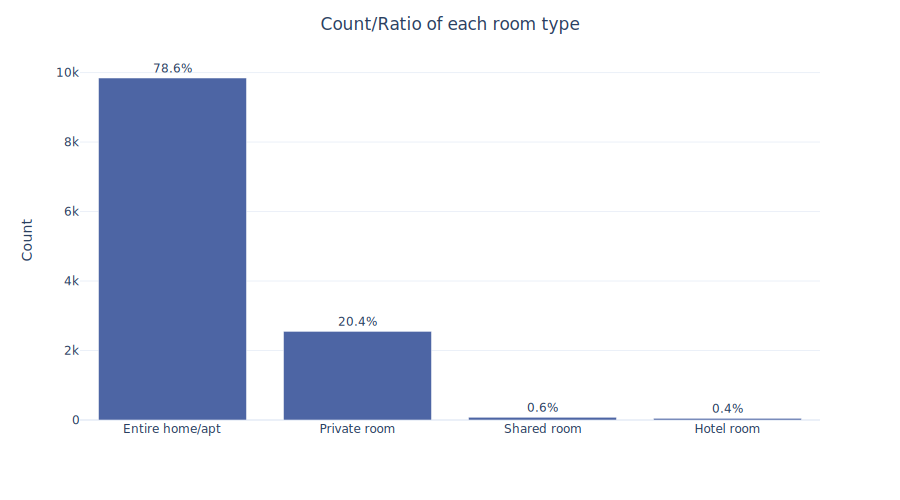

In [17]:
fig = (
      px.bar( df_room1, y = 'count_of_room_type', x = 'room_type',color = 'room_type', text = 'ratio') 
      .update_layout(
          showlegend = False,
          title = 'Count/Ratio of each room type',
          title_x = 0.5,
          xaxis_title = ' ',
          yaxis_title = 'Count',
          height = 500,
          width = 900,
          template = 'plotly_white'
      )
          
      .update_traces(
           textposition = 'outside',
           texttemplate = '%{text:.1%}',
           marker_color = ['#4d65a4']
      )
)
fig.show(renderer='svg')

### Revenue for each month

In [18]:
df_cal= ( 
          df_cal
          .assign(date = lambda df: pd.to_datetime(df['date'], format = '%Y-%m-%d', errors = 'coerce' ))
          .assign(monthly_period = lambda df: df['date'].dt.to_period('M'))
          .assign(price = lambda df: df['price'].str.replace('$',' '))
          .assign(price = lambda df: pd.to_numeric(df['price'],errors = 'coerce'))
)
df_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,monthly_period
0,40625,2023-03-15,f,164.0,$164.00,1,180,2023-03
1,40625,2023-03-16,f,164.0,$164.00,1,180,2023-03
2,40625,2023-03-17,f,183.0,$183.00,1,180,2023-03
3,40625,2023-03-18,f,183.0,$183.00,1,180,2023-03
4,40625,2023-03-19,f,164.0,$164.00,1,180,2023-03


In [19]:
revenue = df_cal.loc[(df_cal['date'] >= '2023-04-01') & (df_cal['date']<= '2024-02-29')].copy()

In [20]:
revenue = (
           revenue
           .groupby('monthly_period')
           .agg(revenue_per_month = ('price','sum'))
           .sort_values('monthly_period')
           .reset_index()
)
revenue

,monthly_period,revenue_per_month
0,2023-04,38585321.0
1,2023-05,40286148.0
2,2023-06,40092648.0
3,2023-07,42262922.0
4,2023-08,43344281.0
5,2023-09,42066701.0
6,2023-10,42290535.0
7,2023-11,39739563.0
8,2023-12,45986035.0
9,2024-01,41939875.0


In [21]:
revenue = revenue.astype({'monthly_period':str})

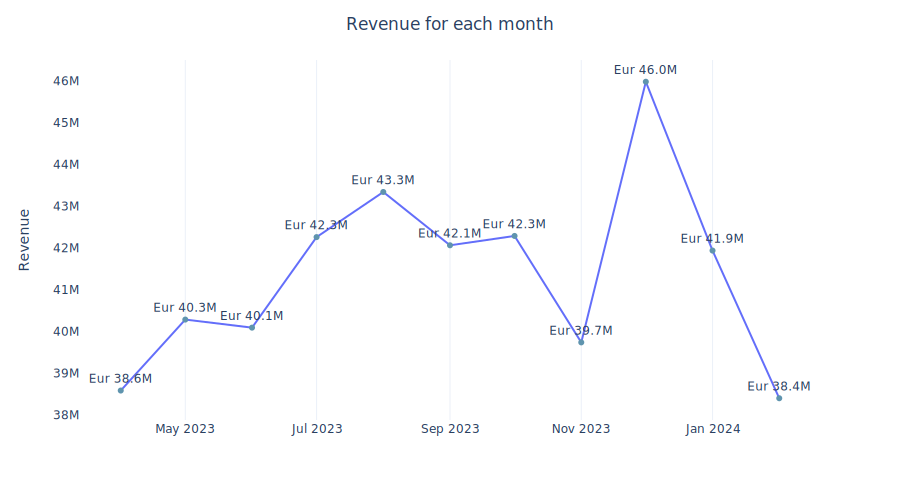

In [22]:
fig = ( 
        px
        .line(revenue, x = 'monthly_period', y = 'revenue_per_month', text = 'revenue_per_month')
        .update_layout(
            title = 'Revenue for each month',
            title_x = 0.5,
            xaxis_title = ' ',
            yaxis_title = 'Revenue',
            yaxis_showgrid = False,
            template = 'plotly_white',
            height = 500,
            width = 900
        )
        .update_traces(
            mode = 'markers + lines + text',
            textposition = 'top center',
            texttemplate = 'Eur %{text:.3s}',
            marker_color = '#5f94ae'
        )
            
)          
fig.show(renderer='svg')